# HomeWork 4

**DeadLine : 12:00 PM 28 Mehr 1399**

**Total points : 120pts**


Import some prerequisites

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 30 pts**

Here is for your helper functions(optional)

Implement this function for changing phases and amplitudes of images.

In [3]:
def draw_phase_amplitude(image):
    '''
    Returns the phase image and the amplitude image from the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        tuple of numpy.ndarray: The tuple of the phase image and the amplitude image.   
    '''
    
    phase = image.copy()
    amp = image.copy()
    
    #Writer your code here
    rows,cols = image.shape
    f = np.fft.fft2(image)

    phase = np.angle(f)
    amp = np.abs(f)

    return phase, np.log(amp)

def change_phase_domain(image1, image2):
    '''
    Substitutes the phase of image1 by the phase of image2 and returns two new images.
    
    Parameters:
        image1 (numpy.ndarray): The input image1.
        image2 (numpy.ndarray): The input image2.
    
    Returns:
        tuple of numpy.ndarray: The tuple of result images.   
    '''
    
    img1 = image1.copy()
    img2 = image2.copy()
    
#     Write your code here
    j = np.complex(0,1)
    phase1, amp1 = draw_phase_amplitude(img1)
    phase2, amp2 = draw_phase_amplitude(img2)
    amp1 = np.exp(amp1)
    amp2 = np.exp(amp2)
    
    
    phase2_sin = np.sin(phase2)
    phase2_cos = np.cos(phase2)

    
    rows,cols = img1.shape
    C = np.zeros((rows,cols),dtype=np.complex_)
    for row in range(0, rows):
        for col in range(0, cols):
            A = amp1[row, col]
            C[row, col] = A*phase2_cos[row, col] + j*A*phase2_sin[row, col]
    img1 = np.real(np.fft.ifft2(C))
    
    phase1_sin = np.sin(phase1)
    phase1_cos = np.cos(phase1)
    
    rows,cols = img2.shape
    C = np.zeros((rows,cols),dtype=np.complex_)
    for row in range(0, rows):
        for col in range(0, cols):
            A = amp2[row, col]
            C[row, col] = A*phase1_cos[row, col] + j*A*phase1_sin[row, col]
    img2 = np.real(np.fft.ifft2(C))
    
    return img1, img2

Test your implementation (dont change this cell)

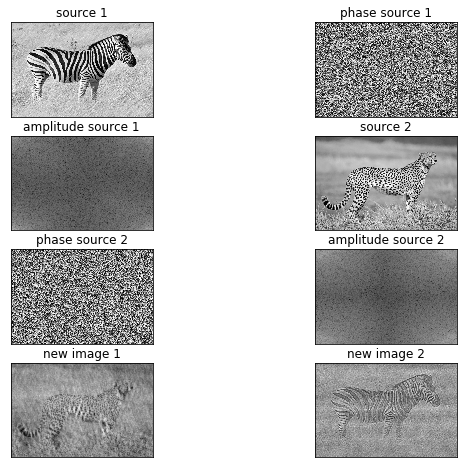

In [4]:
image_list = []
image1 = cv2.imread(os.path.join('images', '1.jpg'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join('images', '2.jpg'), cv2.IMREAD_GRAYSCALE)

image_list.append([image1, 'source 1', 'img'])

phase1, amp1 = draw_phase_amplitude(image1)
image_list.append([phase1, 'phase source 1', 'img'])
image_list.append([amp1, 'amplitude source 1', 'img'])

image_list.append([image2, 'source 2', 'img'])

phase2, amp2 = draw_phase_amplitude(image2)
image_list.append([phase2, 'phase source 2', 'img'])
image_list.append([amp2, 'amplitude source 2', 'img'])

res1, res2 = change_phase_domain(image1, image2)
image_list.append([res1, 'new image 1', 'img'])
image_list.append([res2, 'new image 2', 'img'])

plotter(image_list, 4, 2, True, 10, 8, 'Q3')

# PART 4

**Point : 25 pts**

Here is for your helper functions(optional)

Implement this function for denoising input image and return the result image.

In [5]:
def denoise_image(image):
    '''
    Denoises the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result denoised image.   
    '''
    
    denoised = image.copy()
    
    #Write your code here
    
#     Uncomment the line below to see how i covered the noise in frequency domain
#     denoised = np.log(np.abs(np.fft.fftshift(np.fft.fft2(denoised))))
    denoised = np.fft.fftshift(np.fft.fft2(denoised))
    
    
    rows,cols = image.shape
    coordinates = [rows/2, rows*3/8, rows*5/8 + 2]
    final_c = []
    for item in coordinates:
        final_c.append(item-2)
        final_c.append(item-1)
        final_c.append(item)
        final_c.append(item+1)
        final_c.append(item+2)
    print(final_c)
    my_range = range(195, 317)
    for row in range(0, rows):
        for col in range(0, cols):
#             outer lines
            if row in final_c or col in final_c:
                if row not in my_range and col not in my_range:
                    denoised[row, col] = 0.0001
#             midlines
            if col in range(int(cols/2)-1, int(cols/2)+2) or row in range(int(rows/2)-1, int(rows/2)+2):
                if col not in range(226, 287) or row not in range(226, 287):
                    denoised[row, col] = 0.0001
#             squares
            if col in range(172, 213) or col in range(300, 341):
                if row in range(172, 213) or row in range(300, 341):
                    denoised[row, col] = 0.0001
        
    denoised = np.real(np.fft.ifft2(np.fft.ifftshift(denoised)))      
    
    return denoised

Test your implementation (dont change this cell)

[254.0, 255.0, 256.0, 257.0, 258.0, 190.0, 191.0, 192.0, 193.0, 194.0, 320.0, 321.0, 322.0, 323.0, 324.0]


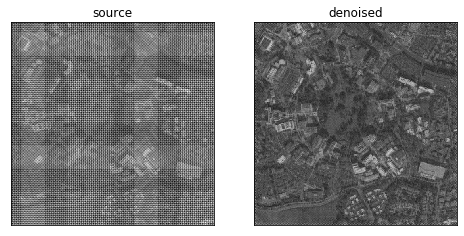

In [6]:
image_list = []
image = cv2.imread(os.path.join('images', '3.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
image_list.append([denoise_image(image), 'denoised', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q4')

# PART 5

**Point : 25 pts**

Here is for your helper functions(optional)

Implement this function for enhancing input image and return result image.

In [7]:
def enhance_image(image):
    '''
    Enhances the input image by applying a filter in the frequency domain.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result enhanced image.   
    '''
    
    enhanced = image.copy()
    
    #Write your code here
    working = np.fft.fftshift(np.fft.fft2(image))
    rows, cols = working.shape
    kernel = np.zeros((rows,cols), np.float)
       
    mid_r = int(rows/2)
    mid_c = int(cols/2)
    std = 1
    
    k = 1/(2 * np.pi * std * std)
    for i in range(0, rows):
        for j in range(0, cols):
            r = mid_r-i
            s = mid_c-j
            kernel[i, j] = (1 / np.exp((r*r + s*s) / (2 * std * std)))*k
            
    
    max_ = kernel.max()
    for i in range(0, rows):
        for j in range(0, cols):
            kernel[i,j] *= -1
            kernel[i,j] += max_ + 100
            working[i,j] *= kernel[i,j]
#     print(kernel)
    enhanced = np.real(np.fft.ifft2(np.fft.ifftshift(working)))
    
    return enhanced

Test your implementation (dont change this cell)

c:\users\sara\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


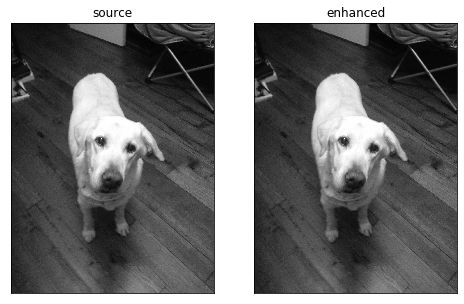

In [8]:
image_list = []
image = cv2.imread(os.path.join('images', '4.jpg'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source','img'])
image_list.append([enhance_image(image), 'enhanced', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'Q5')

for create proper files for sending in quera run this cell.

In [9]:
!python notebook_converter.py

End!!!